In [140]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline
#device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 모의 1: GAS MEAN TEMP 만 다루기 위한 데이터 전처리

### 예시 : 1월 데이터

In [141]:
# df = pd.read_csv('C:/Users/Sejong/Desktop/한화오션/모의csv파일/general_pivot_1.csv', encoding = 'cp949')
# df = df.drop([df.columns[i] for i in range(3,38,2)], axis = 1)
# df['kst'] = [df['kst'][i][11:] for i in range(0,88194)]
# df.rename(columns = {'癤풼s_date' : 'date'}, inplace = True)
# df_gas = df.iloc[:, :8] # gas temerature data frame
# df_gas_mean = pd.concat([df.iloc[:, :2], df.iloc[:,7]], axis = 1)
# df_gas_mean_new = {'date' : [],
#                    'kst' : [],
#                    'GAS MEAN TEMP' :[]}

# for i in range(0,len(df_gas_mean['date']),2): # 0, 2, 4,...
#     MEAN = (df_gas_mean['ME(S) CYL EXH GAS MEAN TEMP'][i] + df_gas_mean['ME(S) CYL EXH GAS MEAN TEMP'][i+1]) / 2
#     df_gas_mean_new['date'].append(df_gas_mean['date'][i])
#     df_gas_mean_new['kst'].append(df_gas_mean['kst'][i])
#     df_gas_mean_new['GAS MEAN TEMP'].append(MEAN)

# df_gas_mean_new = pd.DataFrame(df_gas_mean_new)
# df_gas_mean_new

### 1-8월 까지의 데이터 GAS MEAN TEMP 만 뽑아서 dataframe 작성

In [142]:
for idx in range(1,9): # 1월부터 8월까지
    df = pd.read_csv('./모의csv파일/general_pivot_{}.csv'.format(idx), encoding = 'cp949')
    df = df.drop([df.columns[i] for i in range(3,38,2)], axis = 1)
    df['kst'] = [df['kst'][i][11:] for i in range(0,len(df['kst']))]
    df.rename(columns = {'癤풼s_date' : 'date'}, inplace = True)
    df_gas = df.iloc[:, :8] # gas temerature data frame
    df_gas_mean = pd.concat([df.iloc[:, :2], df.iloc[:,7]], axis = 1)
    globals()['df_gas_mean_new_' + str(idx)] = {'date' : [],
                    'kst' : [],
                    'GAS MEAN TEMP' :[]}
    
    # 새로운 DataFrame 만들기
    for i in range(0,len(df_gas_mean['date']),2): # 0, 2, 4,...

        # 똑같은 시간(09:00, 09:00) 시간의 GAS TEMP 의 평균을 구해서 하나로 합침
        MEAN = (df_gas_mean['ME(S) CYL EXH GAS MEAN TEMP'][i] + df_gas_mean['ME(S) CYL EXH GAS MEAN TEMP'][i+1]) / 2

        # df_gas_mean_new_{}인 DataFrame에 값 할당
        globals()['df_gas_mean_new_' + str(idx)]['date'].append(df_gas_mean['date'][i])
        globals()['df_gas_mean_new_' + str(idx)]['kst'].append(df_gas_mean['kst'][i])
        globals()['df_gas_mean_new_' + str(idx)]['GAS MEAN TEMP'].append(MEAN)
    
    globals()['df_gas_mean_new_' + str(idx)] = pd.DataFrame( globals()['df_gas_mean_new_' + str(idx)]) # df_gas_mewn_new_1,2...8

# 결측치 평균값으로 채우기
df_gas_mean_new_7['GAS MEAN TEMP'][13884:13886] = 293.81375
df_gas_mean_new_7['GAS MEAN TEMP'][13893] = 295.035
df_gas_mean_new_7['GAS MEAN TEMP'][13898:13901] = 295.217
df_gas_mean_new_7['GAS MEAN TEMP'][14916] = 270.82
df_gas_mean_new_7['GAS MEAN TEMP'][14945] = 270.72

### 일별로 데이터가 몇개 있는지 Count

#### 00시 ~ 24시 : 24 * 60 = 1440 
#### 09시 ~ 24시 : 15 * 60 = 900

In [143]:
df_gas_count_dict = { 1: [],
                2: [],
                3: [],
                4: [],
                5 : [],
                6 : [],
                7 : [],
                8 : []}
for idx in range(1,9):
    df_gas_count = globals()['df_gas_mean_new_' + str(idx)].loc[:,'date'].value_counts(sort = False)
    for j in range(1,len(df_gas_count)+1):
        df_gas_count_dict[idx].append(df_gas_count.iloc[j-1])

print(df_gas_count_dict)

{1: [900, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1439, 1440, 1440, 1440, 1440, 1438, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440], 2: [1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440], 3: [1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1439, 1439, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440], 4: [1440, 1440, 1440, 1440, 1440, 1440, 1438, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440], 5: [1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1438, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440], 6: [1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1438,

#### 1월 Data EDA

In [144]:
df_gas_mean_new_1.describe()

,date,GAS MEAN TEMP
count,4.409700e+04,44097.000000
mean,2.023012e+07,262.060428
std,8.842902e+00,61.242246
min,2.023010e+07,49.405500
25%,2.023011e+07,276.027000
50%,2.023012e+07,280.048000
75%,2.023012e+07,283.949500
max,2.023013e+07,313.038000


#### window size : 1시간 으로 slicing -> 간격 : 60, overlap : 10

share, remainder :  672 0
mean_temp length :  672


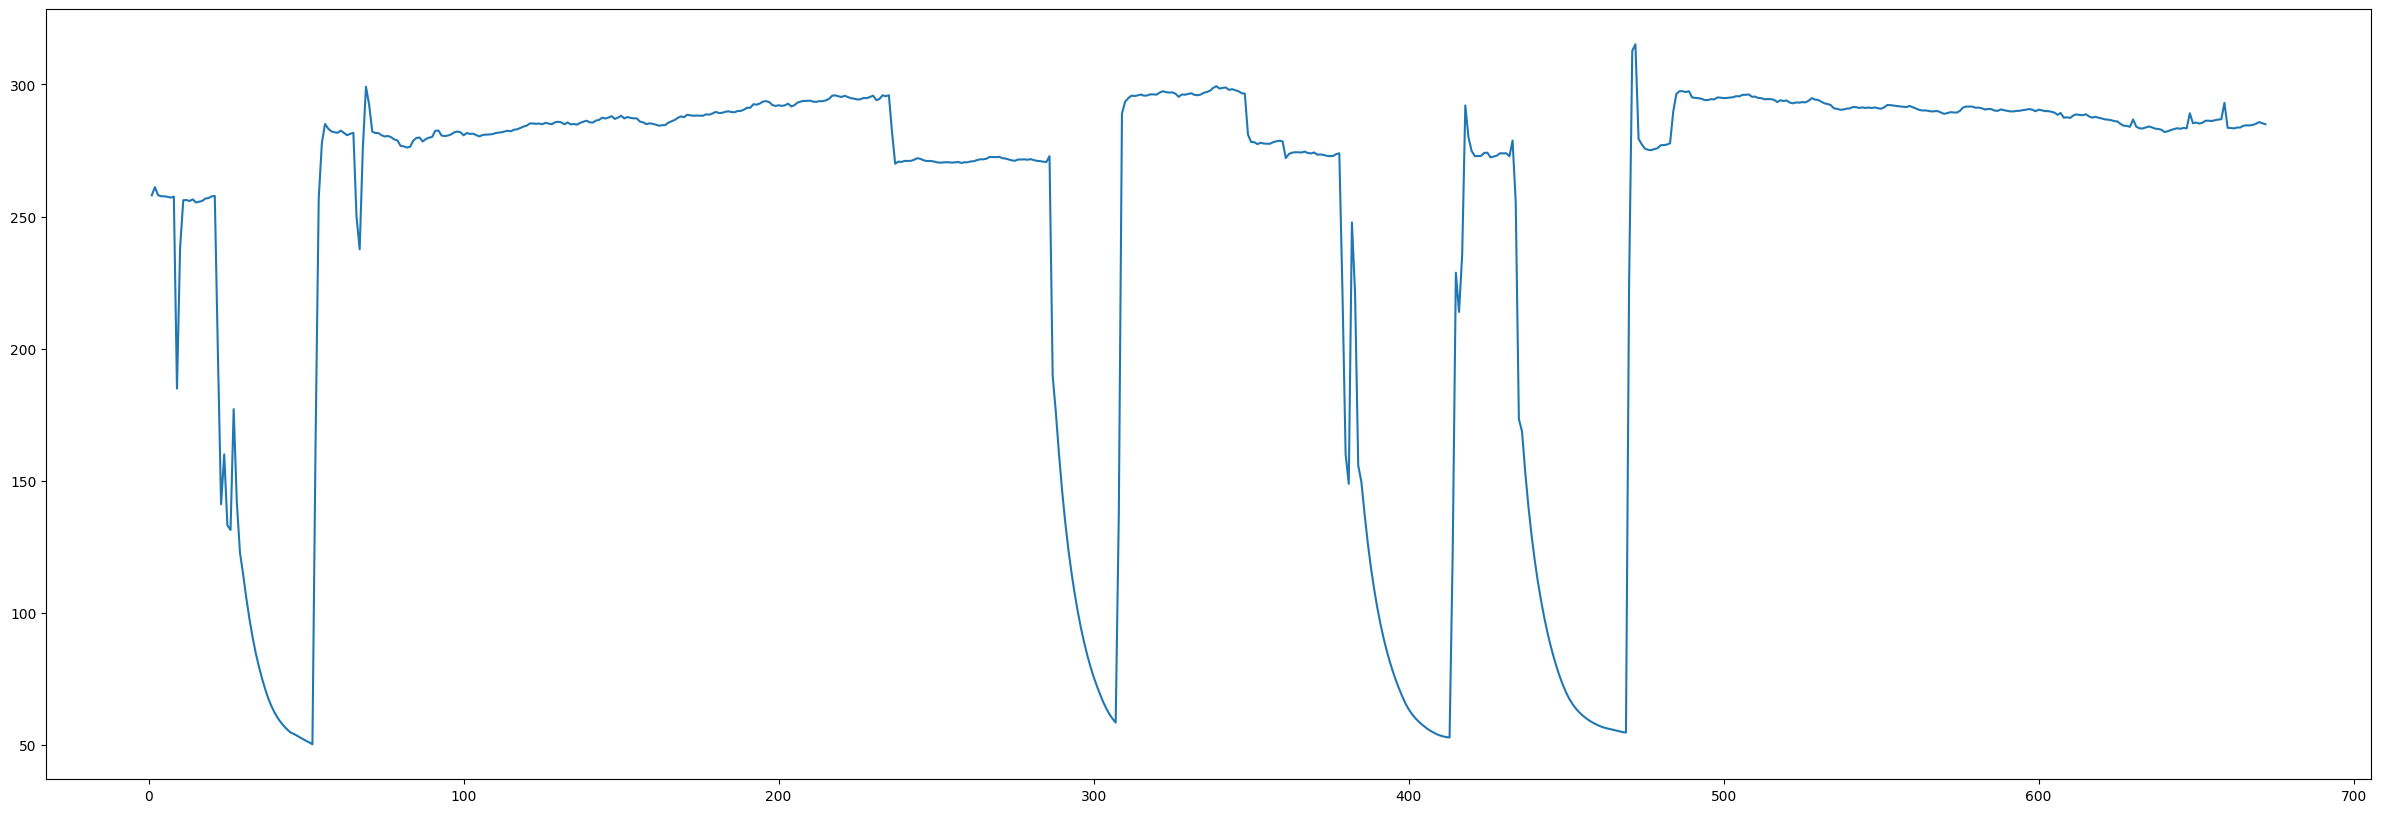

In [145]:
mean_temp = []
#hyper parameter
DATA = df_gas_mean_new_7
LEN = len(DATA['GAS MEAN TEMP'])

# 몫과 나머지 구하기
share, remainder = (LEN // 60), (LEN % 60)
print("share, remainder : ", share, remainder)

for i in range(share):
    mean = round(DATA['GAS MEAN TEMP'][(i)*60:(i+1)*60].mean(),2) # (0,60),(60,120)
    mean_temp.append(mean)

if remainder != 0:
    mean_temp.append(DATA['GAS MEAN TEMP'][share * 60:].mean())

print("mean_temp length : ", len(mean_temp))

plt.figure(figsize = (30,10))
x = np.arange(1,len(mean_temp)+1)
sns.lineplot(x = x, y = mean_temp)
plt.show()

#### 2월부터 7월까지 1시간 단위로 자른 평균 데이터

In [170]:
MEAN_TEMP_2_to_7 = []
MEAN_TEMP_2_to_7_label = []
for i in range(2,8):
    dataset = globals()['df_gas_mean_new_{}'.format(i)]
    LEN = len(dataset['GAS MEAN TEMP'])
    share, remainder = LEN // 60, LEN % 60

    for i in range(share):
        MEAN_TEMP_2_to_7.append(round(dataset['GAS MEAN TEMP'][(i)*60:(i+1)*60].mean(), 2))
        MEAN_TEMP_2_to_7_label.append(0)
    if remainder != 0:
        MEAN_TEMP_2_to_7.append(round(dataset['GAS MEAN TEMP'][share * 60:].mean(),2))
        MEAN_TEMP_2_to_7_label.append(0)
print(np.mean(MEAN_TEMP_2_to_7), np.std(MEAN_TEMP_2_to_7), len(MEAN_TEMP_2_to_7), len(MEAN_TEMP_2_to_7_label))


239.72498595505618 82.41515430848148 4272 4272


In [147]:
L = np.array([244.0,235.0,241.0,240.0])
L.mean()

240.0

#### 모의 함수 정의

In [148]:
def linear_function(data,N,sector): # y = ax + 240
    """
    data : np.array gas temperature data
    N : 몇개의 구간으로 나눌 것인지
    sector : 몇번째 구간의 data인지
    """
    # calculate gradient (a)
    a = 360 / (N+1)
    return data + a * sector
#print(linear_function(L,sector = 1))
linear_function(L,N = 6, sector = 7).mean()

600.0

#### 모의를 위한 random 데이터 추출

In [171]:
# 2월부터 7월까지 데이터 중 모의를 위한 720개 추출 (랜덤 추출)
discuss_data = []
label = []

for i in range(6):
    random_temp = np.random.choice(MEAN_TEMP_2_to_7,720)
    data_tmp = linear_function(random_temp, N = 6, sector = i+1)
    label_tmp = [i+1] * 720
    np.random.shuffle(data_tmp)
    discuss_data.extend(data_tmp)
    label.extend(label_tmp)

for i in range(6):
    random_temp = np.random.choice(MEAN_TEMP_2_to_7,720)
    data_tmp = linear_function(random_temp, N = 6, sector = 7)
    label_tmp = [7] * 720
    np.random.shuffle(data_tmp)
    discuss_data.extend(data_tmp)
    label.extend(label_tmp)

len(discuss_data), len(label)

(8640, 8640)

In [179]:
df = pd.DataFrame({
    'time' : np.arange(1,12913),
    'temp' : np.concatenate([MEAN_TEMP_2_to_7, discuss_data], axis = 0),
    'label' : np.concatenate([MEAN_TEMP_2_to_7_label, label], axis = 0)
})

# 나중에 활성화 시켜야 할 코드
# X = df.iloc[:, :2]
# y = df.iloc[:, 2]
# MEAN_TEMP_2_to_7.extend(discuss_data)
# x = np.arange(len(MEAN_TEMP_2_to_7))
# sns.scatterplot(x = x, y = MEAN_TEMP_2_to_7)

(        time    temp
 0          1  268.30
 1          2  268.40
 2          3  268.62
 3          4  268.47
 4          5  270.31
 ...      ...     ...
 12907  12908  632.11
 12908  12909  641.25
 12909  12910  654.65
 12910  12911  648.28
 12911  12912  654.60
 
 [12912 rows x 2 columns],
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 12907    7
 12908    7
 12909    7
 12910    7
 12911    7
 Name: label, Length: 12912, dtype: int32)

#### window size를 1시간마다 잘라서 ( window_size : 24) 모의구간에서의 데이터 형태가 하나의 직선 형태이게끔 함수 코드 다시

In [ ]:
def linear_function(data,N,sector): # y = ax + 240
    """
    data : np.array gas temperature data
    N : 몇개의 구간으로 나눌 것인지
    sector : 몇번째 구간의 data인지
    """
    # calculate gradient (a)
    a = 360 / (N+1)
    return data + a * sector
#print(linear_function(L,sector = 1))
linear_function(L,N = 6, sector = 7).mean()

In [ ]:
discuss_data = []
label = []

for i in range(6):
    random_temp = np.random.choice(MEAN_TEMP_2_to_7,720)
    data_tmp = linear_function(random_temp, N = 6, sector = i+1)
    label_tmp = [i+1] * 720
    np.random.shuffle(data_tmp)
    discuss_data.extend(data_tmp)
    label.extend(label_tmp)

for i in range(6):
    random_temp = np.random.choice(MEAN_TEMP_2_to_7,720)
    data_tmp = linear_function(random_temp, N = 6, sector = 7)
    label_tmp = [7] * 720
    np.random.shuffle(data_tmp)
    discuss_data.extend(data_tmp)
    label.extend(label_tmp)

len(discuss_data), len(label)

df = pd.DataFrame({
    'time' : np.arange(1,12913),
    'temp' : np.concatenate([MEAN_TEMP_2_to_7, discuss_data], axis = 0),
    'label' : np.concatenate([MEAN_TEMP_2_to_7_label, label], axis = 0)
})

MEAN_TEMP_2_to_7.extend(discuss_data)
x = np.arange(len(MEAN_TEMP_2_to_7))
sns.scatterplot(x = x, y = MEAN_TEMP_2_to_7)

#### 적용할 만한 알고리즘
> 지도 학습
1. 선형회귀 (O)
2. 트리, 앙상블

    > Ensemble
    1. RandomForest
    2. Gradient Boosting
    3. Histogram-based Gradient Boosting
> 비지도 학습
1. 군집 알고리즘
2. k-means clustering


In [195]:
from sklearn.linear_model import LinearRegression, LogisticRegression

x1 = df['time']
y1 = df['temp']
model = LinearRegression()
model.fit(x1.values.reshape(-1,1), y1.values.reshape(-1,1))

print(model.coef_, model.intercept_)

[[0.03985368]] [161.78011439]


In [160]:
# for i in range(8):
#     pivot_data = pd.read_csv('./csv파일/2451_general_pivot_{}.csv'.format(i+1), encoding = 'cp949')
#     pkg_data = pd.read_csv('./csv파일/2451_general_pkg_list_{}.CSV'.format(i+1), encoding = 'cp949')
#     pivot_df = pd.DataFrame(pivot_data)
#     pkg_df = pd.DataFrame(pkg_data) 
#     one = pivot_df.loc[:, 'ds_date'].value_counts(sort=False)
#     two = pkg_df.loc[:, 'ds_date'].value_counts(sort=False)
#     result = pd.concat([one, two], axis =1 )
#     print(result)

In [161]:
# for i in range(8):
#     pivot_data = pd.read_csv('./csv파일/2451_general_pivot_{}.csv'.format(i+1), encoding = 'cp949')
    
#     pivot_df = pd.DataFrame(pivot_data)

#     one = pivot_df.loc[:, 'ds_date'].value_counts(sort=False)

#     print(one)

In [162]:
# for i in range(8):
#     pivot_data = pd.read_csv('./csv파일/2451_general_pkg_list_{}.csv'.format(i+1), encoding = 'cp949')
#     pkg_data = pd.read_csv('./한화오션_예지보전_데이터/2451_general_pkg_list_{}.csv'.format(i+1), encoding = 'cp949')
#     pivot_df = pd.DataFrame(pivot_data)
#     pkg_df = pd.DataFrame(pkg_data)
#     one = pivot_df.loc[:, 'ds_date'].value_counts(sort=False)
#     two = pkg_df.loc[:, 'ds_date'].value_counts(sort=False)
#     result = pd.concat([one, two], axis =1 )
#     print(result)